In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#SCI-kit learn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
diamonds = pd.read_csv('''/home/david/Documents//learning_repositories/dataptmad-0420-classes/week_14/ml_guided_lesson/data/diamonds_train.csv''')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76


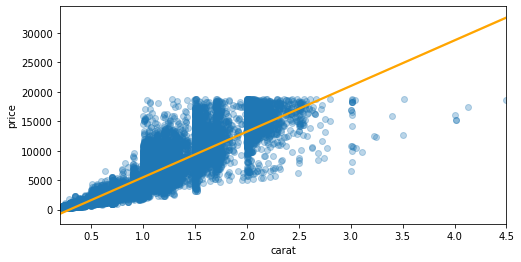

In [3]:
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.regplot(x='carat', y='price', data=diamonds,
            scatter_kws={'alpha':0.3}, line_kws={'color':'orange'})

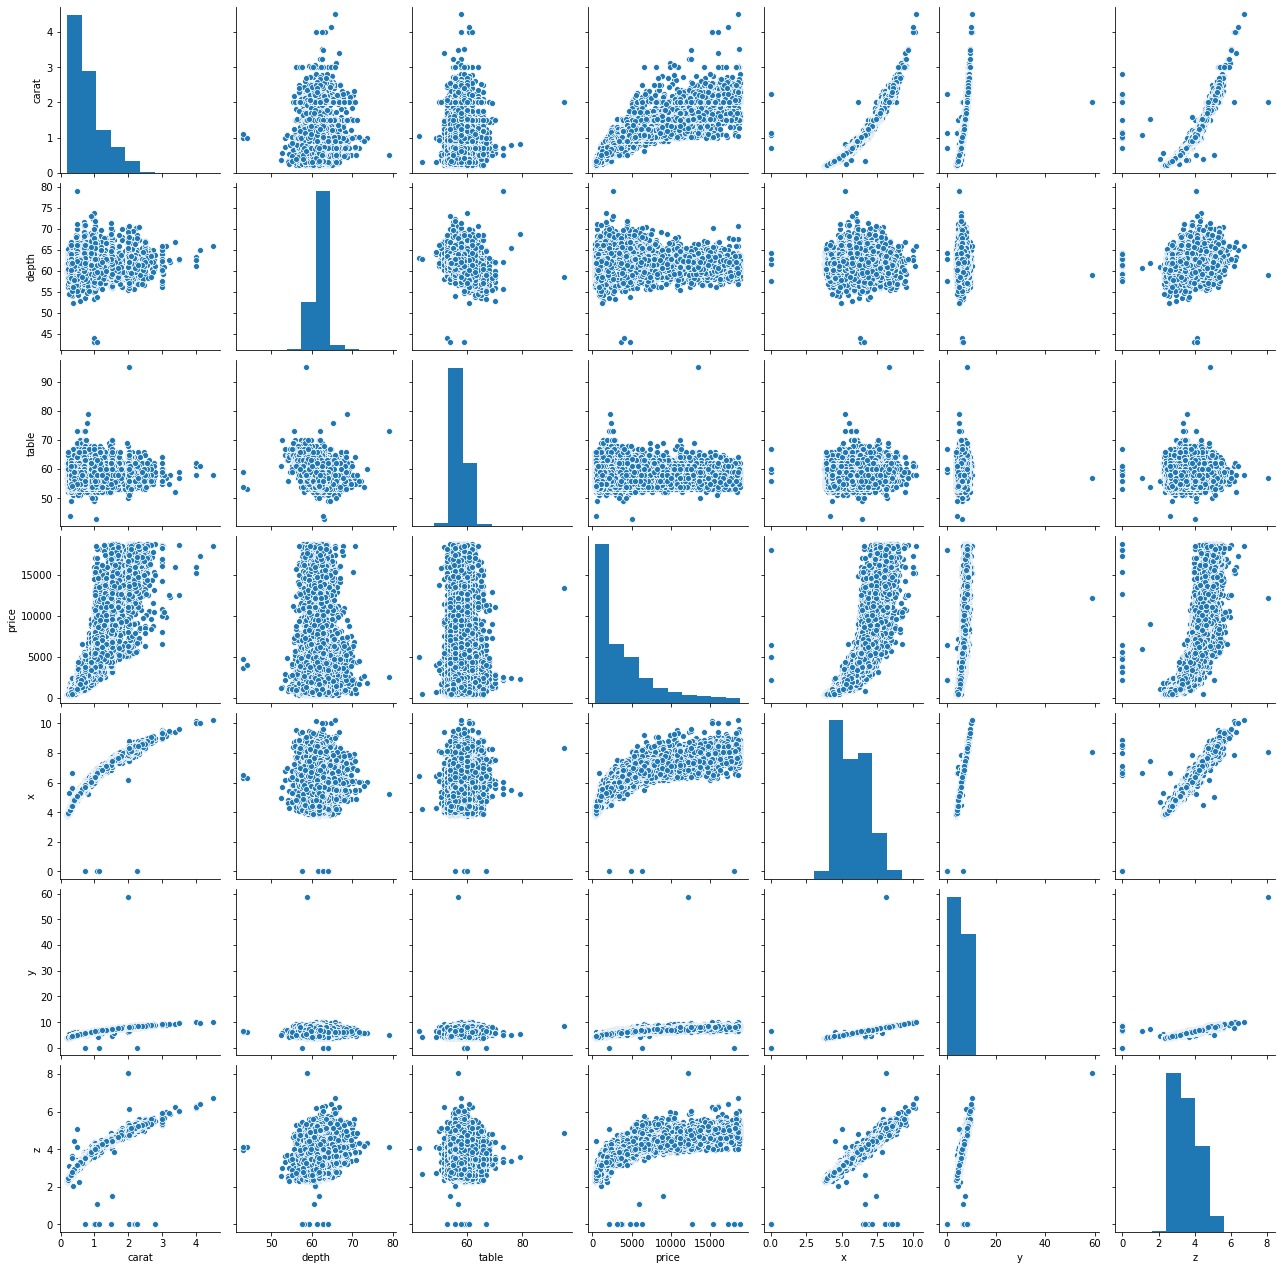

In [5]:
sns.pairplot(diamonds)

In [6]:
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,197.096725
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,52.395750
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,113.436890
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,66.268800
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,168.429975
...,...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43,221.429120
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73,324.276975
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01,163.990554
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76,54.900540


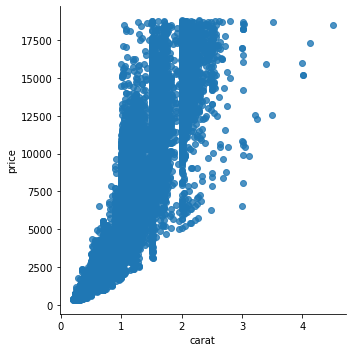

In [8]:
var = ['carat', 'volume']



sns.lmplot(x="carat",
           y="price",
           data= diamonds, fit_reg= False)  

(0.0, 750.0)

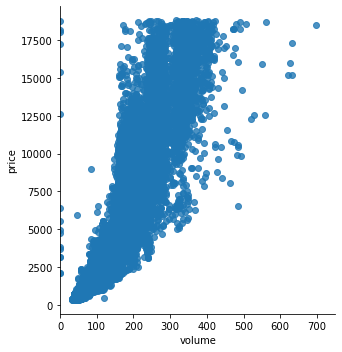

In [9]:
sns.lmplot(x="volume",
           y="price",
           data= diamonds, fit_reg= False)
plt.xlim(0, 750)

In [ ]:
sns.lmplot(x="volume",
           y="price",
           data= diamonds, fit_reg= False)

<AxesSubplot:xlabel='color_grade', ylabel='price'>

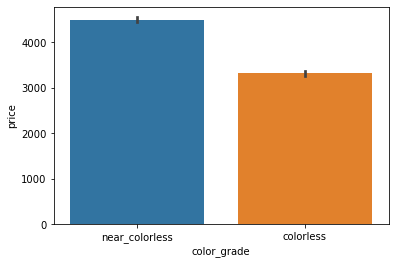

In [43]:
sns.barplot(x="color_grade",
           y="price",
           data= diamonds)

<AxesSubplot:xlabel='clarity_grade', ylabel='price'>

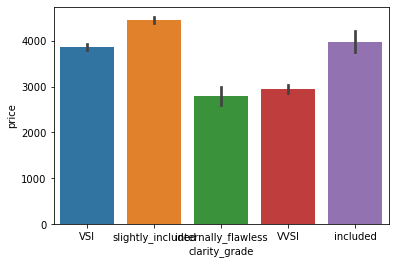

In [45]:
sns.barplot(x="clarity_grade",
           y="price",
           data= diamonds)

<AxesSubplot:xlabel='carat'>

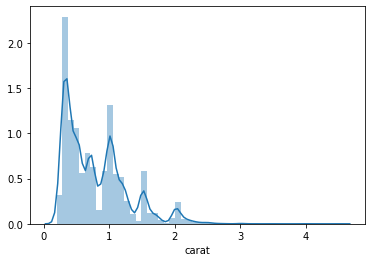

In [15]:
sns.distplot(diamonds['carat'])

In [16]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,197.096725
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,52.395750
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,113.436890
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,66.268800
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,168.429975
...,...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43,221.429120
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73,324.276975
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01,163.990554
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76,54.900540


In [18]:
diamonds['carat_interval'] = pd.cut(diamonds['carat'], 35)

In [19]:
diamonds.clarity.unique()

array(['VS2', 'VS1', 'SI1', 'SI2', 'IF', 'VVS1', 'VVS2', 'I1'],
      dtype=object)

In [20]:
pd.cut(diamonds['carat'], 35)

0        (1.183, 1.306]
1        (0.196, 0.323]
2        (0.691, 0.814]
3        (0.323, 0.446]
4         (0.937, 1.06]
              ...      
40450    (1.306, 1.429]
40451     (1.92, 2.043]
40452     (0.937, 1.06]
40453    (0.323, 0.446]
40454    (1.183, 1.306]
Name: carat, Length: 40455, dtype: category
Categories (35, interval[float64]): [(0.196, 0.323] < (0.323, 0.446] < (0.446, 0.569] < (0.569, 0.691] ... (4.009, 4.131] < (4.131, 4.254] < (4.254, 4.377] < (4.377, 4.5]]

In [21]:
clarity_scale = {
 
    'included': ['I1'],
    'internally_flawless': ['IF'],
    'VSI': ['VS2', 'VS1'],
    'VVSI': ['VVS1', 'VVS2'],
    'slightly_included': ['SI1', 'SI2']
}

color_scale = {
    "colorless": ["D", "E", "F"],
    "near_colorless": ["G", "H", "I", "J"],
    "faint_yellow": ["K", "L", "M"],
    "very_light_yellow": ["N", "O", "P", "Q", "R"],
    "light_yellow": ["S", "T", "U", "V", "W", "X", "Y", "Z"]
}

In [31]:
diamonds['carat_interval'] = pd.cut(diamonds['carat'], 20)
diamonds['color_grade'] = [key for color in diamonds.color for key, item in color_scale.items() if color in item]
diamonds['clarity_grade'] = [key for clarity in diamonds.clarity for key, item in clarity_scale.items() if clarity in item]

In [32]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,carat_interval,color_grade,clarity_grade
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,197.096725,"(1.06, 1.275]",near_colorless,VSI
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,52.395750,"(0.196, 0.415]",near_colorless,VSI
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,113.436890,"(0.63, 0.845]",near_colorless,VSI
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,66.268800,"(0.196, 0.415]",colorless,slightly_included
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,168.429975,"(0.845, 1.06]",near_colorless,slightly_included
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43,221.429120,"(1.275, 1.49]",near_colorless,VSI
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73,324.276975,"(1.92, 2.135]",colorless,slightly_included
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01,163.990554,"(0.845, 1.06]",near_colorless,slightly_included
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76,54.900540,"(0.196, 0.415]",near_colorless,VSI


In [24]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'volume', 'carat_interval', 'color_grade', 'clarity_grade'],
      dtype='object')

In [40]:
diamonds.groupby(['carat_interval', 'clarity_grade', 'color_grade'])[['price']].mean().reset_index()

,carat_interval,clarity_grade,color_grade,price
0,"(0.196, 0.415]",VSI,colorless,805.659935
1,"(0.196, 0.415]",VSI,near_colorless,654.576411
2,"(0.196, 0.415]",VVSI,colorless,892.694611
3,"(0.196, 0.415]",VVSI,near_colorless,783.901126
4,"(0.196, 0.415]",included,colorless,593.105263
...,...,...,...,...
195,"(4.285, 4.5]",included,near_colorless,18531.000000
196,"(4.285, 4.5]",internally_flawless,colorless,NaN
197,"(4.285, 4.5]",internally_flawless,near_colorless,NaN
198,"(4.285, 4.5]",slightly_included,colorless,NaN


In [35]:
diamonds['color_grade'].unique()

array(['near_colorless', 'colorless'], dtype=object)

In [36]:
diamonds['color'].unique()

array(['J', 'H', 'G', 'D', 'F', 'E', 'I'], dtype=object)